<a href="https://colab.research.google.com/github/jainary4/CTA200H/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers  import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical


In [3]:
# we are working with the fashion MINST dataset in which each image is 28x28 pixels
# the dataset is already classified into 60000 train images and 10000 test images
(x_train,_),(x_test, _)= fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)



4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


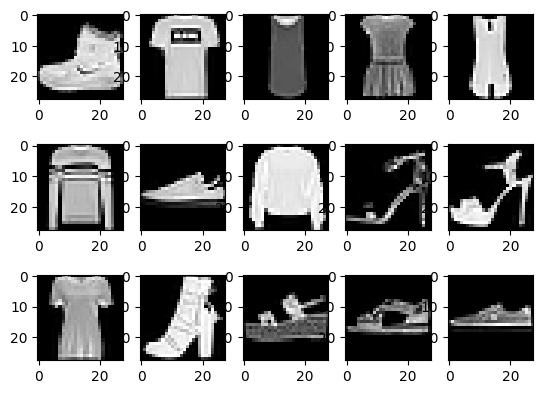

In [4]:
for i in range(0,15):
  plt.subplot(3, 5, i + 1)
  plt.imshow(x_train[i],cmap='gray')

In [5]:
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [49]:
input_size = 784
hidden_size = 128
output_size = 784

In [50]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [51]:
epochs = 10
batch_size = 128

history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.0344 - val_loss: 0.0176
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0141 - val_loss: 0.0119
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0063 - val_loss: 0

313/313 [==============================] - 2s 6ms/step
[[2.6038451  2.5216005  0.7462561  ... 2.6442778  4.6588535  1.4161444 ]
 [2.65774    3.933619   7.3641915  ... 5.399329   1.4234866  1.4893489 ]
 [2.9385335  1.0589278  0.49843043 ... 0.94053537 2.467258   0.8197742 ]
 ...
 [1.5867062  1.4294996  1.6550404  ... 1.9758189  2.1228163  2.1934044 ]
 [0.45355144 0.8487493  0.912354   ... 0.9434621  0.35806605 1.021216  ]
 [1.3664058  1.5711128  0.99605143 ... 2.0164664  1.7916603  1.5069782 ]]


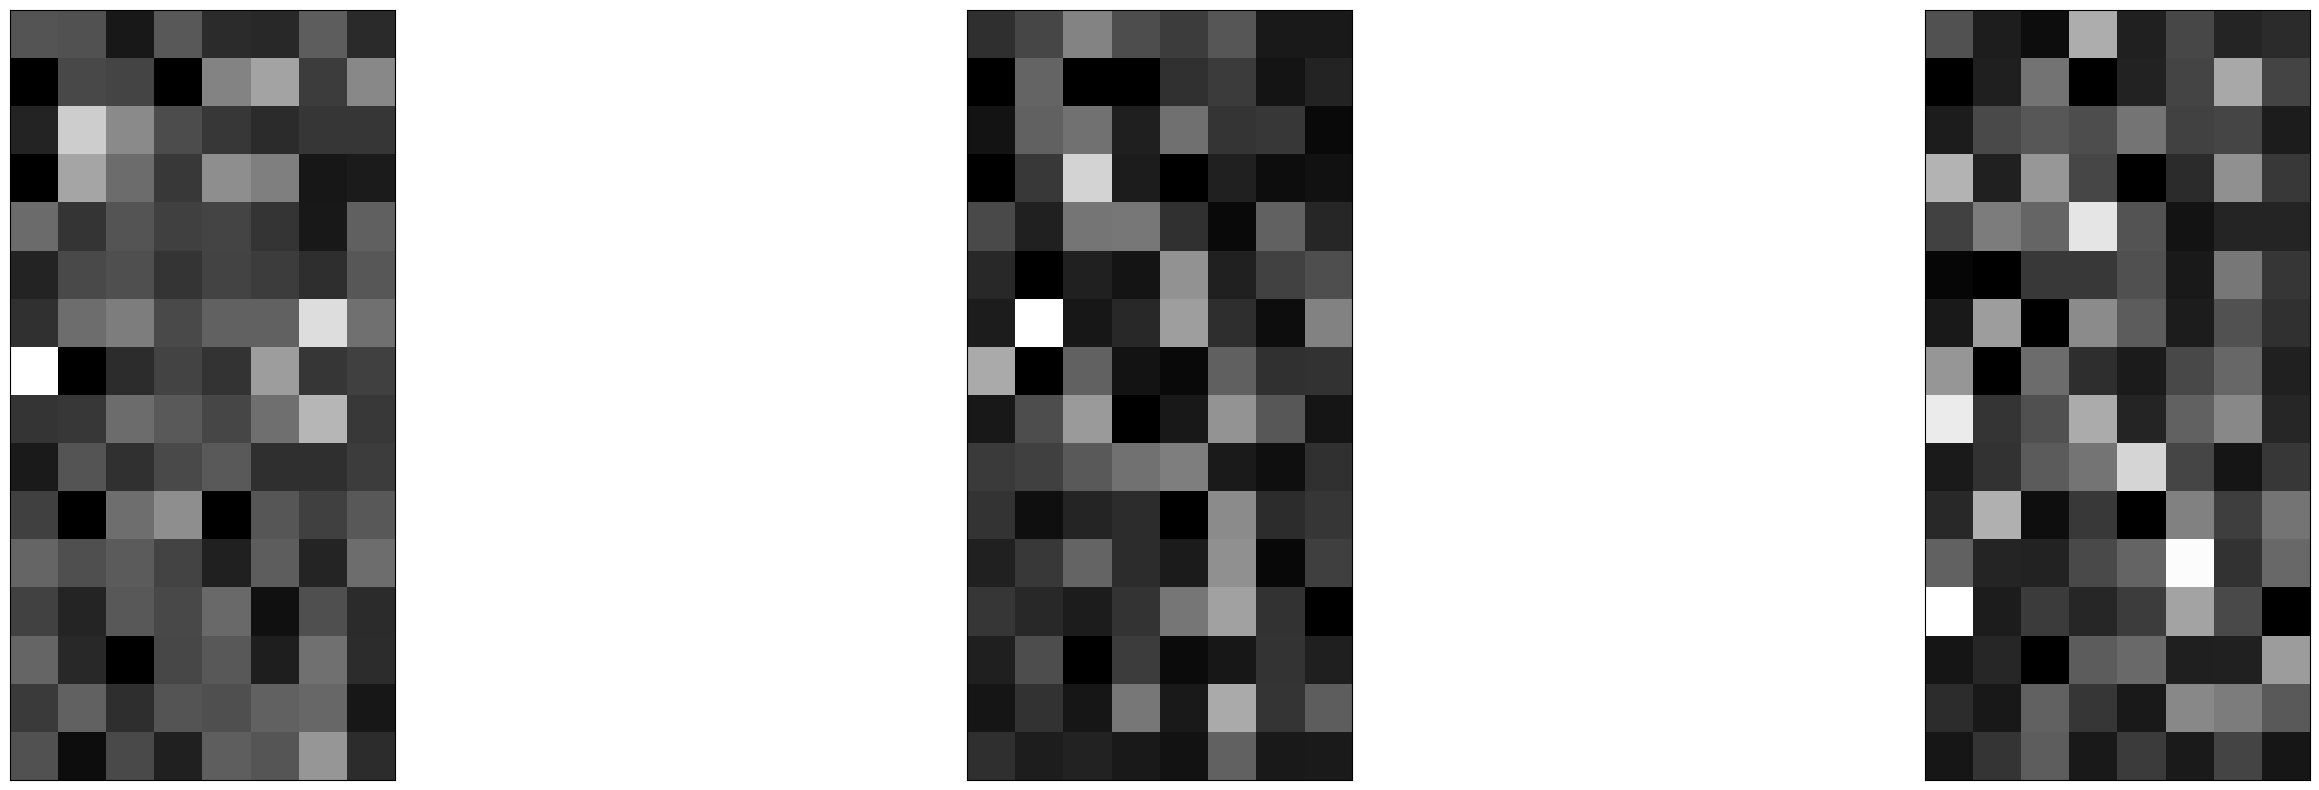

In [52]:
# this code represents the encoded version of the images
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(x_test)
print(encoded_imgs)

n = 3
plt.figure(figsize=(35, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [53]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


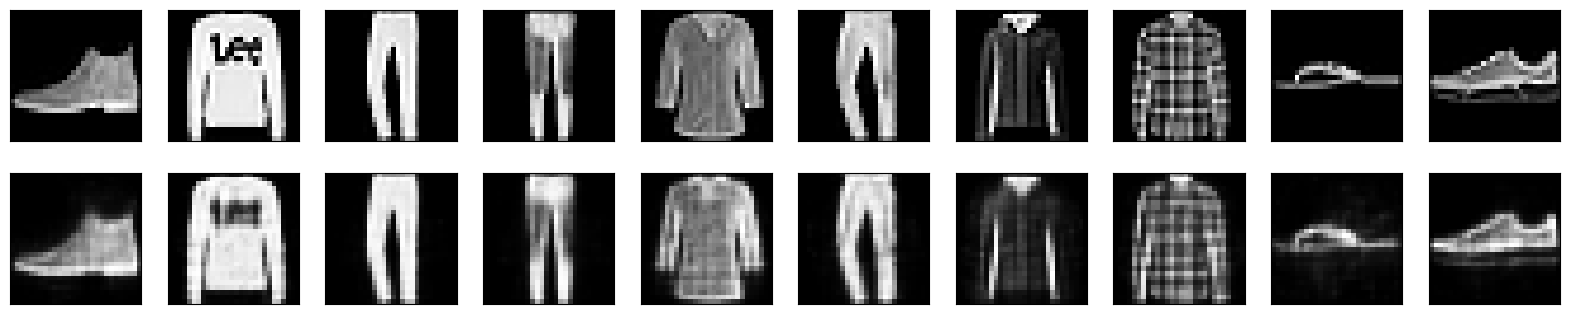

In [54]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()